# Setup

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate

import matplotlib.animation as animate

# Load the image

In [ ]:
path = "/content/MRI.nii.gz"
MRI_nii = nib.load(path)
mri_data = MRI_nii.get_fdata()

In [ ]:
def get_orientation(image):

    """ Determine the orientation of a NIfTI image.
        The affine array is used for this purpose since it gives the position of the image array data in a reference coordinate system.
    """

    affine = image.affine
    orientation = nib.orientations.io_orientation(image.affine)
    codes = nib.orientations.aff2axcodes(affine)
    return codes, orientation

In [ ]:
codes, orientation = get_orientation(MRI_nii)
print(codes, '\n')
print(orientation)

('L', 'A', 'S') 

[[ 0. -1.]
 [ 1.  1.]
 [ 2.  1.]]


# Visualization

In [ ]:
def plot_image_in_planes(image_data):

    """ Plot the image data in sagittal, coronal, and transversal planes.
        We use the function rotate for a better view of the image.

    Parameters:
    image_data (numpy.ndarray): The 3D image data to be plotted.
    """
    angle=90
    sagittal_slice = image_data[image_data.shape[0] // 2, :, :]
    coronal_slice = image_data[:, image_data.shape[1] // 2, :]
    transversal_slice = image_data[:, :, image_data.shape[2] // 2]

    plt.figure(figsize=(10, 30))

    plt.subplot(1, 3, 1)
    plt.imshow(rotate(sagittal_slice, angle=angle),cmap='gray')
    plt.title('Sagittal')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(rotate(coronal_slice, angle=angle), cmap='gray')
    plt.title('Coronal')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(rotate(transversal_slice, angle=angle), cmap='gray')
    plt.title('Transversal')
    plt.axis('off')

In [ ]:
mri_data.shape

(256, 256, 27)

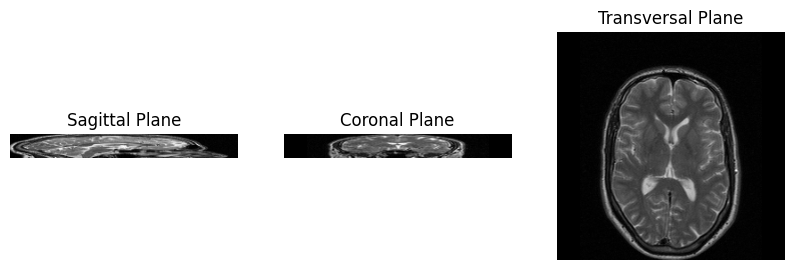

In [ ]:
plot_image_in_planes(mri_data)

In [ ]:
def create_gif(input_image, title=None, filename=None):
    angle = 90
    images = []
    input_image_data = input_image

    fig, axis = plt.subplots(1, 3, figsize=(12, 4))

    trans_slices = input_image_data.shape[2]//2
    coronal_slices = input_image_data.shape[1]//2
    sagittal_slices = input_image_data.shape[0]//2
    num_slices = 10

    for i in range(num_slices):
        # Transversal slice
        trans_img = rotate(input_image_data[:, :, i+trans_slices], angle=angle)
        im_trans = axis[0].imshow(trans_img, cmap='gray', animated=True)

        # Coronal slice
        coronal_img = rotate(input_image_data[:, i+coronal_slices, :], angle=angle)
        im_coronal = axis[1].imshow(coronal_img, cmap='gray', animated=True)

        # Sagittal slice
        sagittal_img = rotate(input_image_data[i+sagittal_slices, :, :], angle=angle)
        im_sagittal = axis[2].imshow(sagittal_img, cmap='gray', animated=True)

        images.append([im_trans, im_coronal, im_sagittal])

    # Create the animation
    ani = animate.ArtistAnimation(fig, images, interval=100, blit=True, repeat_delay=1000)
    axis[0].set_title("Transversal")
    axis[1].set_title("Coronal")
    axis[2].set_title("Sagittal")
    for ax in axis:
        ax.axis('off')

    if title:
        plt.suptitle(title, fontsize=20)

    # Save the animation as a GIF
    ani.save(filename, writer='imagemagick')

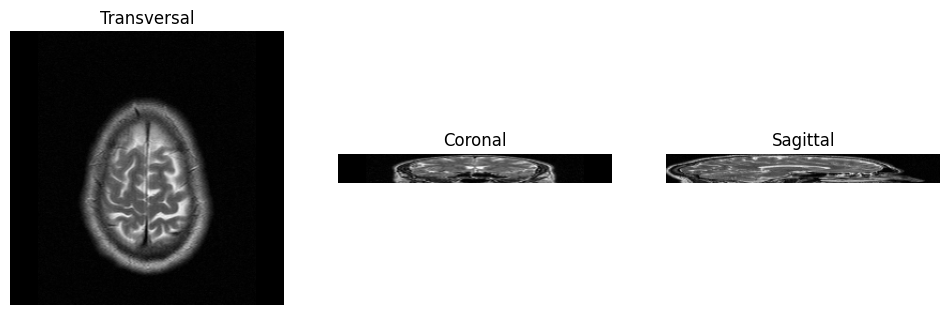

In [ ]:
create_gif(mri_data, title=None, filename="mri_scan_views.gif")

# Change the orientation

In [ ]:
def reorient_image(image, target_orientation):

    """ Reorient image data to the target orientation.
    """

    cur_orientation = nib.orientations.io_orientation(image.affine)
    target_orientation = nib.orientations.axcodes2ornt(target_orientation)
    print(f"target_orientation: {target_orientation}")
    transform = nib.orientations.ornt_transform(cur_orientation, target_orientation)
    reoriented_data = nib.orientations.apply_orientation(image.get_fdata(), transform)
    return reoriented_data

In [ ]:
target_orientation = ('R', 'A', 'S')  #('L', 'I', 'A')
reoriented_data = reorient_image(MRI_nii, target_orientation)

target_orientation: [[0. 1.]
 [1. 1.]
 [2. 1.]]


In [ ]:
#current:  x: R-L, y: A-P, z: I-S
#target:   x: R-L, z: S-I, y: A-P